# House Loan Approval Status

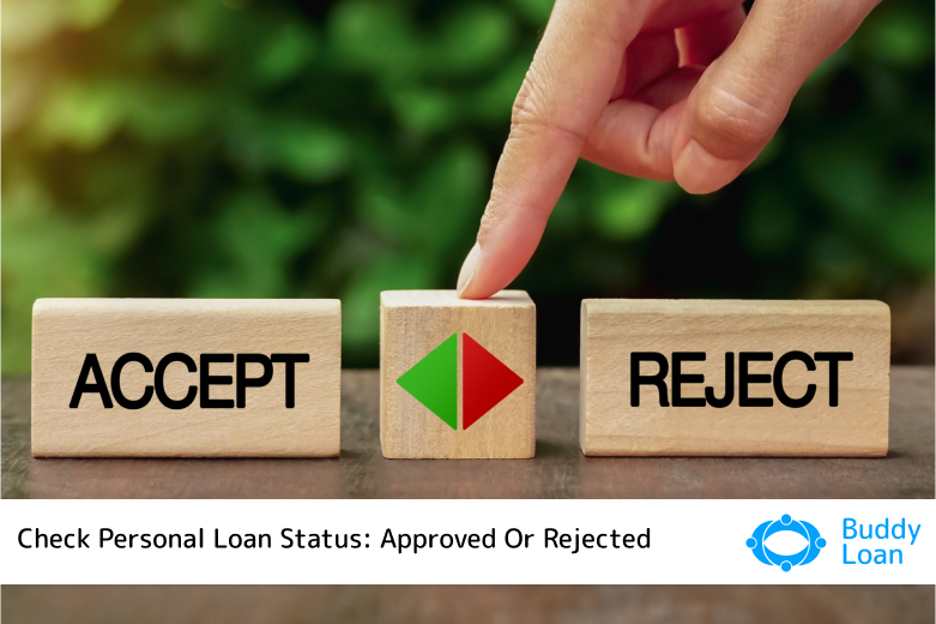

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,r2_score,accuracy_score,confusion_matrix

In [2]:
#Read the data using pandas librarys
df=pd.read_csv('Loan_Data.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#Complete information of records and features  present in data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Insight:-from this we had seen there are may null value present in our data.

# Data Cleaning(EDA)

In [6]:
#Drop the loan id column as it is of no use
df.drop(columns='Loan_ID',inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [8]:
#Replace all the dependents 3+ as 3 and change their data type to float
df['Dependents'].replace('3+','3',inplace=True)

In [9]:
df['Dependents'].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [10]:
df['Dependents']=df['Dependents'].astype(float)

Insights:-Here we had replace the string value that is of no use to numeric so we can use that feature also for prediction

# 1 Label Encoding

In [11]:
df_num=df.select_dtypes([int,float])

In [12]:
df_cat=df.select_dtypes(object)

In [13]:
df_cat

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,Graduate,No,Urban,Y
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y
...,...,...,...,...,...,...
609,Female,No,Graduate,No,Rural,Y
610,Male,Yes,Graduate,No,Rural,Y
611,Male,Yes,Graduate,No,Urban,Y
612,Male,Yes,Graduate,No,Urban,Y


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()

In [16]:
for i in df_cat:
    df_cat[i]=le.fit_transform(df_cat[i])

In [17]:
df_cat

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,2,1
1,1,1,0,0,0,0
2,1,1,0,1,2,1
3,1,1,1,0,2,1
4,1,0,0,0,2,1
...,...,...,...,...,...,...
609,0,0,0,0,0,1
610,1,1,0,0,0,1
611,1,1,0,0,2,1
612,1,1,0,0,2,1


In [18]:
le.classes_

array(['N', 'Y'], dtype=object)

Insights:-Here you can clearly seeing that our data is transform from object to float and all string data is 
    converted into numeric form by one of the most important encoding label encoding.

In [19]:
#conact the df
df=pd.concat([df_num,df_cat],axis=1)

In [20]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
0,0.0,5849,0.0,NaN,360.0,1.0,1,0,0,0,2,1
1,1.0,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
2,0.0,3000,0.0,66.0,360.0,1.0,1,1,0,1,2,1
3,0.0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,2,1
4,0.0,6000,0.0,141.0,360.0,1.0,1,0,0,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,1
610,3.0,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,1
611,1.0,8072,240.0,253.0,360.0,1.0,1,1,0,0,2,1
612,2.0,7583,0.0,187.0,360.0,1.0,1,1,0,0,2,1


In [21]:
#Now we will replace all the null values from our data and move on to prediction

In [22]:
df.isnull().sum()

Dependents           15
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Gender                0
Married               0
Education             0
Self_Employed         0
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

Insights:- Here we replace all the null value with mean and mode 

In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Gender               0
Married              0
Education            0
Self_Employed        0
Property_Area        0
Loan_Status          0
dtype: int64

# Checking Outliers are present or not in our data

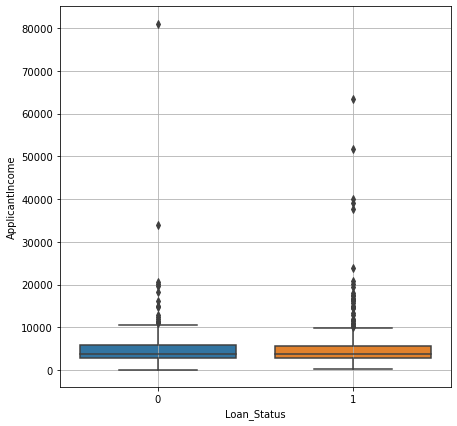

In [26]:
plt.figure(figsize=(7,7))
sns.boxplot(data=df,x='Loan_Status',y='ApplicantIncome')
plt.grid(True)
plt.show()

Insights:-From above box plot we clearly seeing that there are outlier present in our data.

In [27]:
#Removing of outliers
df[(df['Loan_Status']==0)&(df['ApplicantIncome']>30000)]
df[(df['Loan_Status']==1)&(df['ApplicantIncome']>30000)]

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
155,3.0,39999,0.0,600.0,180.0,0.0,1,1,0,0,1,1
171,3.0,51763,0.0,700.0,300.0,1.0,2,1,0,0,2,1
185,0.0,39147,4750.0,120.0,360.0,1.0,1,1,0,1,1,1
333,0.0,63337,0.0,490.0,180.0,1.0,1,1,0,2,2,1
443,1.0,37719,0.0,152.0,360.0,1.0,1,0,0,0,1,1


In [28]:
df.drop(index=[155,171,185,333,443],inplace=True)

Insights:-
    So we clear all the outliers which are presnt in our data

# Model Building

In [29]:
df.drop(columns=['Dependents','Gender','Married'],inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 594 entries, 0 to 613
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    594 non-null    int64  
 1   CoapplicantIncome  594 non-null    float64
 2   LoanAmount         594 non-null    float64
 3   Loan_Amount_Term   594 non-null    float64
 4   Credit_History     594 non-null    float64
 5   Education          594 non-null    int32  
 6   Self_Employed      594 non-null    int32  
 7   Property_Area      594 non-null    int32  
 8   Loan_Status        594 non-null    int32  
dtypes: float64(4), int32(4), int64(1)
memory usage: 37.1 KB


Insights:- Here we remove all the unnecessary features and only important features are there  in our hand
    for prediction

In [31]:
#To seprate X and Y
x=df.iloc[:,:-1]

In [32]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education,Self_Employed,Property_Area
0,5849,0.0,146.412162,360.0,1.0,0,0,2
1,4583,1508.0,128.000000,360.0,1.0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,2
3,2583,2358.0,120.000000,360.0,1.0,1,0,2
4,6000,0.0,141.000000,360.0,1.0,0,0,2
...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0
610,4106,0.0,40.000000,180.0,1.0,0,0,0
611,8072,240.0,253.000000,360.0,1.0,0,0,2
612,7583,0.0,187.000000,360.0,1.0,0,0,2


In [33]:
y=df['Loan_Status']

In [34]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 594, dtype: int32

Insights:-We seperate x and y of our data

In [35]:
#To split x and y
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [36]:
#first create object for all the model
lr=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()
dt=DecisionTreeClassifier()

# Applying Different Models

In [37]:
#build function of mymodel to store all data in mymodel
def mymodel(model):
    model.fit(xtrain, ytrain)
    ypred=model.predict(xtest)
    print(classification_report(ytest, ypred))

In [38]:
mymodel(lr)

              precision    recall  f1-score   support

           0       0.86      0.47      0.61        53
           1       0.81      0.97      0.88       126

    accuracy                           0.82       179
   macro avg       0.84      0.72      0.75       179
weighted avg       0.83      0.82      0.80       179



In [39]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.41      0.32      0.36        53
           1       0.74      0.81      0.77       126

    accuracy                           0.66       179
   macro avg       0.58      0.57      0.57       179
weighted avg       0.64      0.66      0.65       179



In [40]:
mymodel(svm)

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        53
           1       0.71      1.00      0.83       126

    accuracy                           0.71       179
   macro avg       0.85      0.51      0.43       179
weighted avg       0.79      0.71      0.59       179



In [41]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.49      0.60      0.54        53
           1       0.82      0.74      0.78       126

    accuracy                           0.70       179
   macro avg       0.65      0.67      0.66       179
weighted avg       0.72      0.70      0.71       179



In [42]:
#check model balance status

In [43]:
df['Loan_Status'].value_counts()

1    408
0    186
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

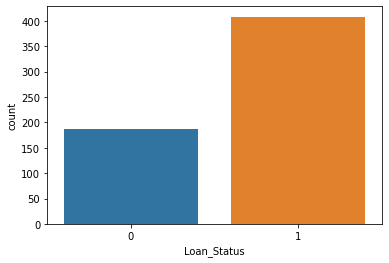

In [44]:
sns.countplot(data=df,x=df['Loan_Status'])

Insights:- From this we get to know that our data is highly imbalanced .

# Over Fitting

In [45]:
!pip install imblearn

In [46]:
from imblearn.over_sampling import RandomOverSampler

In [47]:
ros=RandomOverSampler(random_state=1)

In [48]:
x_train,y_train=ros.fit_resample(xtrain,ytrain)

In [49]:
pd.Series(y_train).value_counts()

1    282
0    282
Name: Loan_Status, dtype: int64

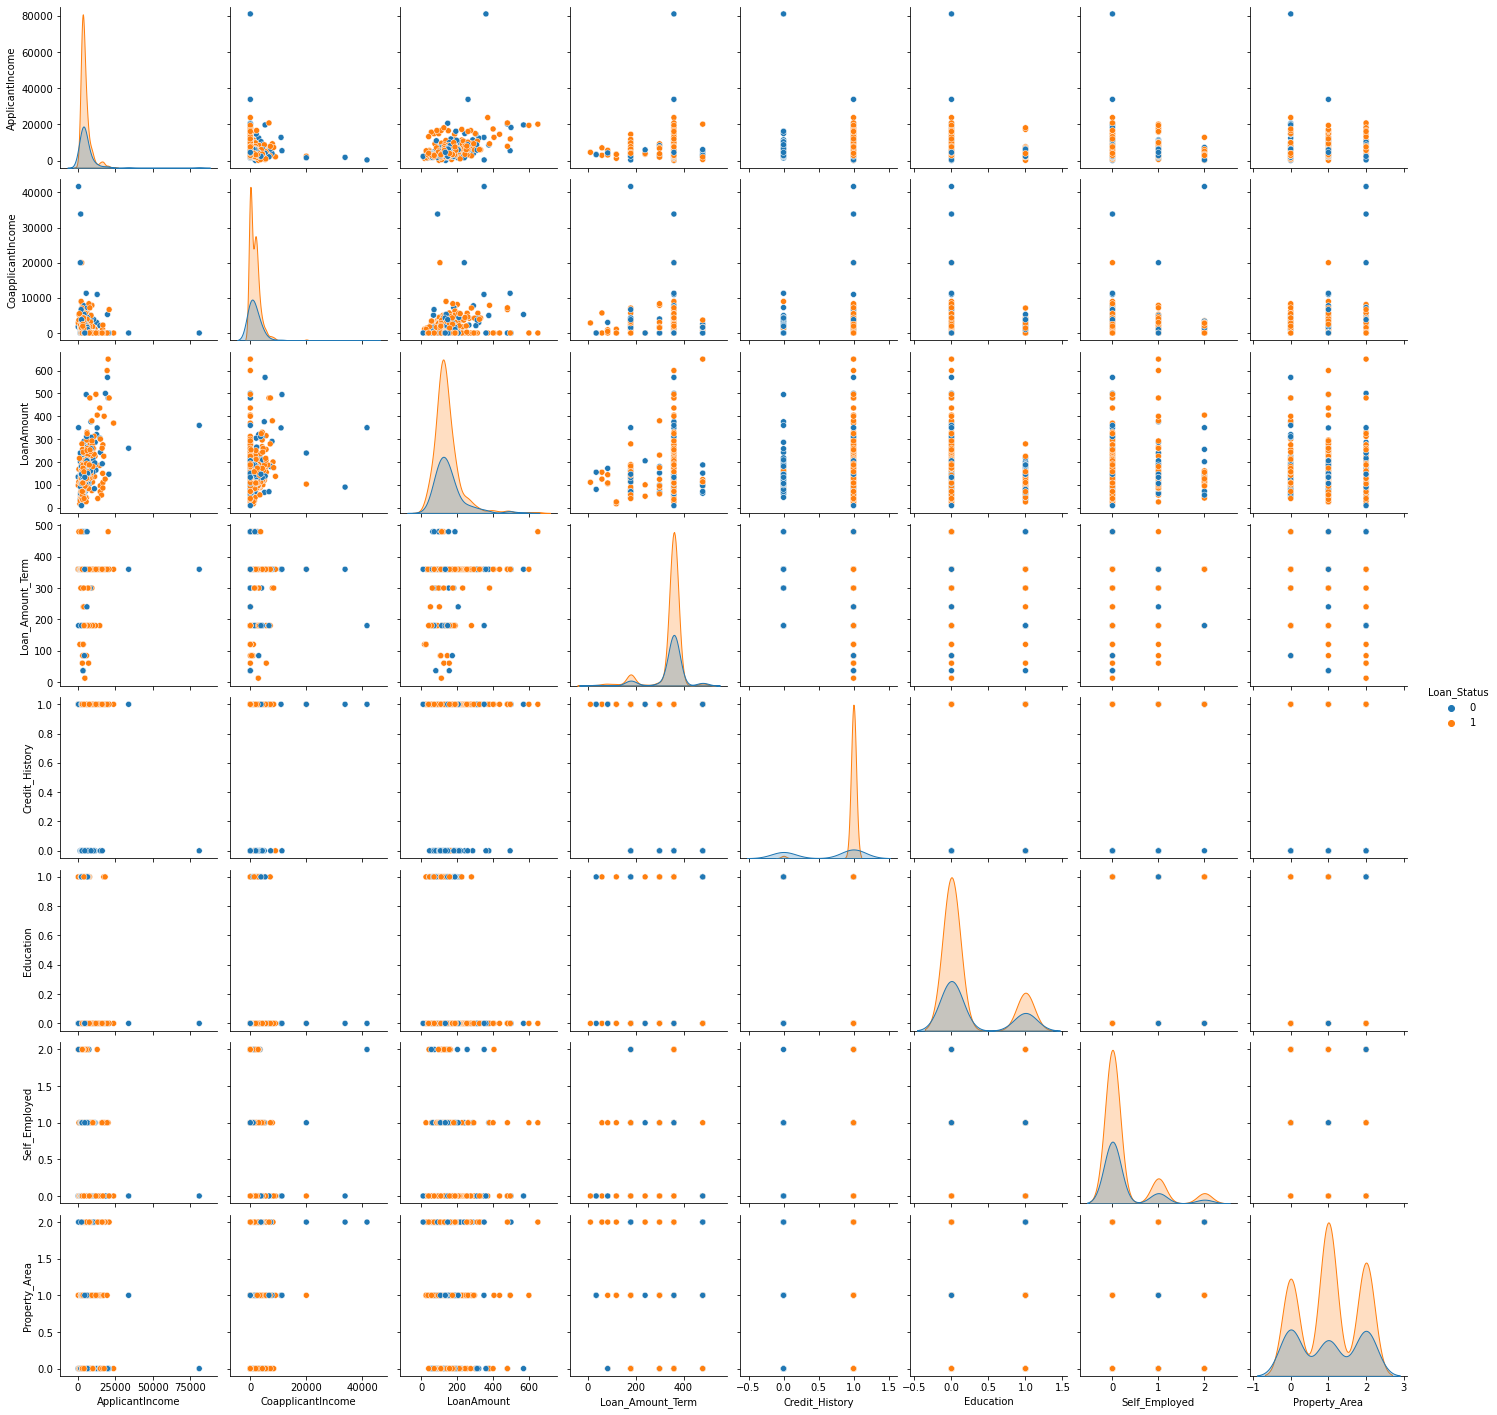

In [50]:
sns.pairplot(df,hue='Loan_Status')
plt.show()

In [51]:
#build function of mymodel to store all data in mymodel
def mymodel1(model1):
    model1.fit(x_train, y_train)
    ypred=model1.predict(xtest)
    print(classification_report(ytest, ypred))

In [52]:
mymodel1(lr)

              precision    recall  f1-score   support

           0       0.55      0.58      0.57        53
           1       0.82      0.80      0.81       126

    accuracy                           0.74       179
   macro avg       0.69      0.69      0.69       179
weighted avg       0.74      0.74      0.74       179



In [53]:
mymodel1(dt)

              precision    recall  f1-score   support

           0       0.45      0.58      0.51        53
           1       0.80      0.70      0.75       126

    accuracy                           0.66       179
   macro avg       0.62      0.64      0.63       179
weighted avg       0.70      0.66      0.68       179



In [54]:
mymodel(knn)

              precision    recall  f1-score   support

           0       0.41      0.32      0.36        53
           1       0.74      0.81      0.77       126

    accuracy                           0.66       179
   macro avg       0.58      0.57      0.57       179
weighted avg       0.64      0.66      0.65       179



In [55]:
mymodel(svm)

              precision    recall  f1-score   support

           0       1.00      0.02      0.04        53
           1       0.71      1.00      0.83       126

    accuracy                           0.71       179
   macro avg       0.85      0.51      0.43       179
weighted avg       0.79      0.71      0.59       179



Insights:-By doing oversampling accuracy has not been increase too much

# Hypertunning Parameter to increase accuracy

# 1 KNN

In [56]:
accuracy =[]
for i in range(1,31):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    ypred = knn.predict(xtest)
    ac= accuracy_score(ytest, ypred)
    accuracy.append(ac)

In [57]:
accuracy

[0.6201117318435754,
 0.5251396648044693,
 0.5921787709497207,
 0.48044692737430167,
 0.5363128491620112,
 0.4748603351955307,
 0.5642458100558659,
 0.5363128491620112,
 0.5642458100558659,
 0.48044692737430167,
 0.5083798882681564,
 0.4692737430167598,
 0.5139664804469274,
 0.4748603351955307,
 0.5083798882681564,
 0.46368715083798884,
 0.4972067039106145,
 0.4692737430167598,
 0.4860335195530726,
 0.4581005586592179,
 0.4972067039106145,
 0.45251396648044695,
 0.4692737430167598,
 0.441340782122905,
 0.4692737430167598,
 0.4692737430167598,
 0.4860335195530726,
 0.46368715083798884,
 0.45251396648044695,
 0.4581005586592179]

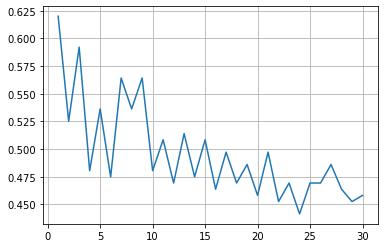

In [58]:
plt.plot(range(1,31), accuracy)
plt.grid(True)
plt.show()

Insights:- Seeing to graph we are deciding the value of k as 19

In [59]:
knn=KNeighborsClassifier(n_neighbors=1)
mymodel1(knn)

              precision    recall  f1-score   support

           0       0.36      0.38      0.37        53
           1       0.73      0.72      0.73       126

    accuracy                           0.62       179
   macro avg       0.55      0.55      0.55       179
weighted avg       0.62      0.62      0.62       179



Insights:-After Hypertunning we are getting accuracy as 62%

# Hypertunning the parameter of logistic regression

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
sc=StandardScaler()

In [62]:
x_train=sc.fit_transform(x_train)

In [63]:
xtest=sc.transform(xtest)

In [64]:
lr1=LogisticRegression(solver='liblinear')
mymodel1(lr1)

              precision    recall  f1-score   support

           0       0.64      0.55      0.59        53
           1       0.82      0.87      0.85       126

    accuracy                           0.78       179
   macro avg       0.73      0.71      0.72       179
weighted avg       0.77      0.78      0.77       179



In [65]:
lr2=LogisticRegression(solver='sag')
mymodel1(lr2)

              precision    recall  f1-score   support

           0       0.64      0.55      0.59        53
           1       0.82      0.87      0.85       126

    accuracy                           0.78       179
   macro avg       0.73      0.71      0.72       179
weighted avg       0.77      0.78      0.77       179



In [66]:
lr3=LogisticRegression(solver='saga')
mymodel1(lr3)

              precision    recall  f1-score   support

           0       0.64      0.55      0.59        53
           1       0.82      0.87      0.85       126

    accuracy                           0.78       179
   macro avg       0.73      0.71      0.72       179
weighted avg       0.77      0.78      0.77       179



In [67]:
lr4 = LogisticRegression(solver='newton-cg',penalty='l2')
mymodel1(lr4)

              precision    recall  f1-score   support

           0       0.64      0.55      0.59        53
           1       0.82      0.87      0.85       126

    accuracy                           0.78       179
   macro avg       0.73      0.71      0.72       179
weighted avg       0.77      0.78      0.77       179



Insights:-By hypertunning in LogisticRegression we are getting maximum accuracy on liblinear

# Hypertunning Decision Tree

In [68]:
for i in range(1,50):
    dt5 = DecisionTreeClassifier(max_depth=i)
    dt5.fit(x_train,y_train)
    ypred = dt5.predict(xtest)
    print(f"{i} = {accuracy_score(ytest,ypred)}")

1 = 0.8212290502793296
2 = 0.8212290502793296
3 = 0.8268156424581006
4 = 0.776536312849162
5 = 0.8044692737430168
6 = 0.5754189944134078
7 = 0.5810055865921788
8 = 0.7318435754189944
9 = 0.6927374301675978
10 = 0.7430167597765364
11 = 0.7374301675977654
12 = 0.7094972067039106
13 = 0.6256983240223464
14 = 0.664804469273743
15 = 0.7094972067039106
16 = 0.7039106145251397
17 = 0.664804469273743
18 = 0.6703910614525139
19 = 0.6983240223463687
20 = 0.6871508379888268
21 = 0.6759776536312849
22 = 0.664804469273743
23 = 0.6815642458100558
24 = 0.6983240223463687
25 = 0.6536312849162011
26 = 0.659217877094972
27 = 0.6703910614525139
28 = 0.6759776536312849
29 = 0.6871508379888268
30 = 0.6815642458100558
31 = 0.6759776536312849
32 = 0.6703910614525139
33 = 0.6815642458100558
34 = 0.6815642458100558
35 = 0.6983240223463687
36 = 0.6815642458100558
37 = 0.664804469273743
38 = 0.6759776536312849
39 = 0.664804469273743
40 = 0.7039106145251397
41 = 0.6759776536312849
42 = 0.6815642458100558
43 = 0.6

In [69]:
dt1=DecisionTreeClassifier(max_depth=3)
mymodel1(dt1)

              precision    recall  f1-score   support

           0       0.89      0.47      0.62        53
           1       0.81      0.98      0.89       126

    accuracy                           0.83       179
   macro avg       0.85      0.72      0.75       179
weighted avg       0.84      0.83      0.81       179



In [70]:
for i in range(2,51):
    dt2 = DecisionTreeClassifier(min_samples_split=i)
    dt2.fit(xtrain,ytrain)
    ypred = dt2.predict(xtest)
    print(f"{i} = {accuracy_score(ytest,ypred)}")

2 = 0.7039106145251397
3 = 0.7039106145251397
4 = 0.7039106145251397
5 = 0.7039106145251397
6 = 0.29608938547486036
7 = 0.29608938547486036
8 = 0.29608938547486036
9 = 0.29608938547486036
10 = 0.29608938547486036
11 = 0.29608938547486036
12 = 0.29608938547486036
13 = 0.29608938547486036
14 = 0.29608938547486036
15 = 0.29608938547486036
16 = 0.29608938547486036
17 = 0.29608938547486036
18 = 0.29608938547486036
19 = 0.29608938547486036
20 = 0.29608938547486036
21 = 0.29608938547486036
22 = 0.29608938547486036
23 = 0.29608938547486036
24 = 0.29608938547486036
25 = 0.29608938547486036
26 = 0.29608938547486036
27 = 0.29608938547486036
28 = 0.29608938547486036
29 = 0.29608938547486036
30 = 0.29608938547486036
31 = 0.29608938547486036
32 = 0.29608938547486036
33 = 0.29608938547486036
34 = 0.29608938547486036
35 = 0.29608938547486036
36 = 0.29608938547486036
37 = 0.29608938547486036
38 = 0.29608938547486036
39 = 0.29608938547486036
40 = 0.29608938547486036
41 = 0.29608938547486036
42 = 0.29608

In [71]:
dt5=DecisionTreeClassifier(min_samples_split=2)
mymodel1(dt5)

              precision    recall  f1-score   support

           0       0.48      0.58      0.53        53
           1       0.81      0.74      0.77       126

    accuracy                           0.69       179
   macro avg       0.65      0.66      0.65       179
weighted avg       0.71      0.69      0.70       179



In [72]:
dt4=DecisionTreeClassifier(min_samples_leaf=10)
mymodel1(dt4)

              precision    recall  f1-score   support

           0       0.43      0.70      0.53        53
           1       0.83      0.61      0.70       126

    accuracy                           0.64       179
   macro avg       0.63      0.65      0.62       179
weighted avg       0.71      0.64      0.65       179



In [73]:
for i in range(1,51):
    dt3 = DecisionTreeClassifier(min_samples_leaf=i)
    dt3.fit(x_train,y_train)
    ypred = dt3.predict(xtest)
    print(f"{i} = {accuracy_score(ytest,ypred)}")

1 = 0.6703910614525139
2 = 0.6368715083798883
3 = 0.6759776536312849
4 = 0.664804469273743
5 = 0.6480446927374302
6 = 0.659217877094972
7 = 0.6703910614525139
8 = 0.6759776536312849
9 = 0.6927374301675978
10 = 0.6368715083798883
11 = 0.6759776536312849
12 = 0.7094972067039106
13 = 0.7094972067039106
14 = 0.6536312849162011
15 = 0.6536312849162011
16 = 0.6536312849162011
17 = 0.6871508379888268
18 = 0.6256983240223464
19 = 0.6256983240223464
20 = 0.6312849162011173
21 = 0.6312849162011173
22 = 0.6089385474860335
23 = 0.6089385474860335
24 = 0.6201117318435754
25 = 0.6201117318435754
26 = 0.6480446927374302
27 = 0.6480446927374302
28 = 0.6815642458100558
29 = 0.6368715083798883
30 = 0.6480446927374302
31 = 0.6480446927374302
32 = 0.6480446927374302
33 = 0.6145251396648045
34 = 0.6145251396648045
35 = 0.6145251396648045
36 = 0.6145251396648045
37 = 0.6424581005586593
38 = 0.6424581005586593
39 = 0.664804469273743
40 = 0.6815642458100558
41 = 0.6759776536312849
42 = 0.6033519553072626
43 =

In [74]:
dt4 = DecisionTreeClassifier(max_depth=3,min_samples_leaf=43,min_samples_split=2)
mymodel1(dt4)

              precision    recall  f1-score   support

           0       0.68      0.53      0.60        53
           1       0.82      0.90      0.86       126

    accuracy                           0.79       179
   macro avg       0.75      0.71      0.73       179
weighted avg       0.78      0.79      0.78       179



Insights:-Hence we are getting maximum accuracy when max_depth is 3

# Hypertunning svm parameter

In [75]:
svm1=SVC(kernel='linear')
mymodel1(svm1)

              precision    recall  f1-score   support

           0       0.86      0.47      0.61        53
           1       0.81      0.97      0.88       126

    accuracy                           0.82       179
   macro avg       0.84      0.72      0.75       179
weighted avg       0.83      0.82      0.80       179



In [76]:
svm2=SVC(kernel='poly')
mymodel1(svm2)

              precision    recall  f1-score   support

           0       0.57      0.53      0.55        53
           1       0.81      0.83      0.82       126

    accuracy                           0.74       179
   macro avg       0.69      0.68      0.68       179
weighted avg       0.74      0.74      0.74       179



In [77]:
svm3=SVC(kernel='sigmoid')
mymodel1(svm3)

              precision    recall  f1-score   support

           0       0.45      0.55      0.50        53
           1       0.79      0.72      0.76       126

    accuracy                           0.67       179
   macro avg       0.62      0.63      0.63       179
weighted avg       0.69      0.67      0.68       179



Insights:-In this from linear solver we are getting best accuracy

# Ensemble learning

In [78]:
models=[]
accuracy=[]
models.append(('logistic',LogisticRegression()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('svm',SVC(probability=True)))

In [79]:
for name,model_obj in models:
    model_obj.fit(xtrain,ytrain)
    ypred=model_obj.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    accuracy.append(ac)

In [80]:
accuracy

[0.8212290502793296, 0.7039106145251397, 0.7039106145251397]

In [81]:
ac_accuracy=np.array(accuracy)
np.mean(ac_accuracy)

0.7430167597765364

# Bagging

In [82]:
from sklearn.ensemble import BaggingClassifier

In [83]:
bg=BaggingClassifier(LogisticRegression())
bg.fit(x_train,y_train)
ypred=bg.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.64      0.55      0.59        53
           1       0.82      0.87      0.85       126

    accuracy                           0.78       179
   macro avg       0.73      0.71      0.72       179
weighted avg       0.77      0.78      0.77       179



In [84]:
bg1=BaggingClassifier(DecisionTreeClassifier())
bg1.fit(x_train,y_train)
ypred=bg1.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.55      0.62      0.58        53
           1       0.83      0.79      0.81       126

    accuracy                           0.74       179
   macro avg       0.69      0.70      0.70       179
weighted avg       0.75      0.74      0.74       179



In [85]:
bg2=BaggingClassifier(SVC())
bg2.fit(x_train,y_train)
ypred=bg2.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.44      0.58      0.50        53
           1       0.80      0.68      0.74       126

    accuracy                           0.65       179
   macro avg       0.62      0.63      0.62       179
weighted avg       0.69      0.65      0.67       179



In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf=RandomForestClassifier()
#In random forest default value is 100 and build a
#Machine model in 100 subset model
rf.fit(x_train,y_train)
ypred=rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.65      0.64      0.65        53
           1       0.85      0.86      0.85       126

    accuracy                           0.79       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.79      0.79      0.79       179



In [88]:
from sklearn.ensemble import VotingClassifier

In [89]:
vc=VotingClassifier(models,voting='hard')
rf.fit(x_train,y_train)
ypred=rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.65      0.60      0.63        53
           1       0.84      0.87      0.85       126

    accuracy                           0.79       179
   macro avg       0.75      0.73      0.74       179
weighted avg       0.78      0.79      0.79       179



In [90]:
vc=VotingClassifier(models,voting='soft')
rf.fit(x_train,y_train)
ypred=rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.61      0.62      0.62        53
           1       0.84      0.83      0.84       126

    accuracy                           0.77       179
   macro avg       0.73      0.73      0.73       179
weighted avg       0.77      0.77      0.77       179



# Boosting

In [91]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [92]:
ad = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [93]:
mymodel1(ad)

              precision    recall  f1-score   support

           0       0.57      0.62      0.59        53
           1       0.83      0.80      0.82       126

    accuracy                           0.75       179
   macro avg       0.70      0.71      0.71       179
weighted avg       0.76      0.75      0.75       179



In [94]:
mymodel1(gbc)

              precision    recall  f1-score   support

           0       0.59      0.57      0.58        53
           1       0.82      0.83      0.83       126

    accuracy                           0.75       179
   macro avg       0.70      0.70      0.70       179
weighted avg       0.75      0.75      0.75       179



In [95]:
mymodel1(xgb)

              precision    recall  f1-score   support

           0       0.67      0.66      0.67        53
           1       0.86      0.87      0.86       126

    accuracy                           0.80       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.80      0.80      0.80       179



# Final Model

In [96]:
dt1=DecisionTreeClassifier(max_depth=3)
mymodel1(dt1)

              precision    recall  f1-score   support

           0       0.89      0.47      0.62        53
           1       0.81      0.98      0.89       126

    accuracy                           0.83       179
   macro avg       0.85      0.72      0.75       179
weighted avg       0.84      0.83      0.81       179



# Prediction

In [97]:
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Education,Self_Employed,Property_Area
0,5849,0.0,146.412162,360.0,1.0,0,0,2
1,4583,1508.0,128.000000,360.0,1.0,0,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,2
3,2583,2358.0,120.000000,360.0,1.0,1,0,2
4,6000,0.0,141.000000,360.0,1.0,0,0,2
...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,0,0,0
610,4106,0.0,40.000000,180.0,1.0,0,0,0
611,8072,240.0,253.000000,360.0,1.0,0,0,2
612,7583,0.0,187.000000,360.0,1.0,0,0,2


In [98]:
inpdata=dt1.predict([[5000,1050,0,360,1,0,1,0]])

In [99]:
inpdata

array([1])

After doing boosting and bagging we can see still our accuracy is same i.e 80% our accuracy didn't increased

So as we can see that we are getting almost same accuracy by using Logistic Regression,
Support vector machine and Random Forest Classifier

So we are selecting Decision Tree Classifier for our model prediction as its values are best suited for our model.


# Prescriptive analysis

- ___After studying the dataset, we can see that there are few main parameters based on which there are high chances of rejection__
       1 ApplicantIncome      
       2 LoanAmount
       3 Loan_Amount_Term
       4 Credit_History
       5 Education  
       6 Self_Employed   

- __Measures to take in order to avoid Avoid Rejection status__ 
       1 Applicant should have income less than 10000.
       2 Loan_Amount_Term must be of 360 days.
       3 Education must be necessary.